In [1029]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import linregress



In [1030]:
#upload csv file and make dataframe

company = "fortune_1000_part.csv"
fortune_df = pd.read_csv(company)
fortune_df.head()

,Company,Revenues ($M),Profits ($M),Assets ($M),Employees,Sector,Industry,City,State
0,Walmart,"$500,343","$9,862.00","$204,522","2,300,000",Retailing,General Merchandisers,Bentonville,AR
1,Exxon Mobil,"$244,363","$19,710.00","$348,691","71,200",Energy,Petroleum Refining,Irving,TX
2,Berkshire Hathaway,"$242,137","$44,940.00","$702,095","377,000",Financials,Insurance: Property and Casualty (Stock),Omaha,NE
3,Apple,"$229,234","$48,351.00","$375,319","123,000",Technology,"Computers, Office Equipment",Cupertino,CA
4,UnitedHealth Group,"$201,159","$10,558.00","$139,058","260,000",Health Care,Health Care: Insurance and Managed Care,Minnetonka,MN


In [1031]:
#fixing the column types so we can work with them

fortune_df["revenue"] = pd.to_numeric(fortune_df["Revenues ($M)"].replace({'\$':'',',':'', '&':''},regex = True))
fortune_df["employees"] = pd.to_numeric(fortune_df["Employees"].replace({'\$':'',',':''},regex = True))
fortune_df.head()


#this bar graph was too much
#plt.bar(fortune_df["Company"][0:99], fortune_df["Employees"][0:99], align='center', alpha=0.5)
#plt.show
#fortune_df.dtypes
fortune_df['Sector'].unique()


array(['Retailing', 'Energy', 'Financials', 'Technology', 'Health Care',
       'Wholesalers', 'Telecommunications', 'Motor Vehicles &  Parts',
       'Food &  Drug Stores', 'Industrials', 'Aerospace &  Defense',
       'Household Products', 'Transportation',
       'Food, Beverages &  Tobacco', 'Chemicals', 'Media', 'Apparel',
       'Materials', 'Hotels, Restaurants &  Leisure', 'Business Services',
       'Engineering &  Construction'], dtype=object)

In [1032]:
#color_scheme = {'grn':'#808000', 'Blue':'#5F9EA0', 'Red':'#8B3A3A'}
#city_color = {'retailing': color_scheme['grn'], 'Energy': color_scheme['Blue'], 'financial': color_scheme['Red']}



#creating new dataframes by sector
retailing = fortune_df[fortune_df['Sector'] == 'Retailing']
Energy = fortune_df[fortune_df['Sector'] == 'Energy']
finance = fortune_df[fortune_df['Sector'] == 'Financials']
tech = fortune_df[fortune_df['Sector'] == 'Technology']
healthcare = fortune_df[fortune_df['Sector'] == 'Health Care']
wholesalers = fortune_df[fortune_df['Sector'] == 'Wholesalers']
telcom = fortune_df[fortune_df['Sector'] == 'Telecommunications']
motorvehicles = fortune_df[fortune_df['Sector'] == 'Motor Vehicles &  Parts']
food = fortune_df[fortune_df['Sector'] == 'Food &  Drug Stores']
industrials = fortune_df[fortune_df['Sector'] == 'Industrials']
aerospace = fortune_df[fortune_df['Sector'] == 'Aerospace &  Defense']
household = fortune_df[fortune_df['Sector'] == 'Household Products']
transportation  = fortune_df[fortune_df['Sector'] == 'Transportation']
foodbevtobacco = fortune_df[fortune_df['Sector'] == 'Food, Beverages &  Tobacco']
chemicals = fortune_df[fortune_df['Sector'] == 'Chemicals']
media = fortune_df[fortune_df['Sector'] == 'Media']
apparel = fortune_df[fortune_df['Sector'] == 'Apparel']
materials = fortune_df[fortune_df['Sector'] == 'Materials']
hotels = fortune_df[fortune_df['Sector'] == 'Hotels, Restaurants &  Leisure']
business = fortune_df[fortune_df['Sector'] == 'Business Services']
engineering = fortune_df[fortune_df['Sector'] == 'Engineering &  Construction']

#bubble scatter plot that was unnecessary 
#xvalues = range(len(retailing['Company']))


#plt.scatter(xvalues, retailing["revenue"], s = retailing['employees']*.001,color = city_color['retailing'],edgecolor = 'black', label = 'Retailing', alpha = .5 )
#plt.scatter(Energy['Company'], Energy["revenue"], s = Energy['Employees']*10,color = city_color['Energy'], edgecolor = 'black', label = 'Energy', alpha = .5 )
#plt.scatter(financial['Company'], financial["revenue"], s = financial['Employees']*10,color = city_color['financial'], edgecolor = 'black', label = 'financial', alpha = .5 )




In [1033]:
state_array = fortune_df["State"].unique()
state_array
maxamount = 0
len(state_array)
    
state_array

array(['AR', 'TX', 'NE', 'CA', 'MN', 'RI', 'WA', 'MI', 'PA', 'OH', 'NY',
       'MA', 'IL', 'GA', 'NC', 'MO', 'IN', 'NJ', 'VA', 'Michigan', 'CT',
       'TN', 'ID', 'KY', 'MD', 'FL', 'OR', 'WI', 'CO', 'AZ', 'LA', 'IA',
       'OK', 'NV', 'KS', 'DE', 'AL', 'SC', 'ND', 'MS', 'UT',
       'Puerto Rico', 'NH', 'HI', 'VT', 'ME'], dtype=object)

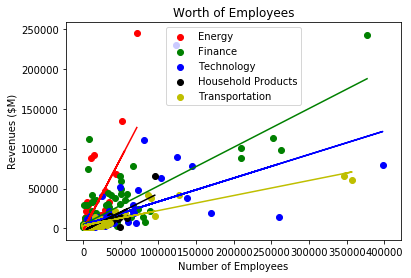

In [1034]:
#plotting 5 of the 21 companies on on graph # replace ax1 with plt
#fig, (ax1, ax2,ax3,ax4) = plt.subplots(2,2)

plt.scatter(Energy['employees'], Energy["revenue"], color = 'r', label = 'Energy')
plt.scatter(finance['employees'], finance["revenue"], color = 'g',label = 'Finance')
plt.scatter(tech['employees'], tech["revenue"], color = 'b',label = 'Technology')
plt.scatter(household['employees'], household["revenue"], color = 'k',label = 'Household Products')
plt.scatter(transportation['employees'], transportation["revenue"], color = 'y', label = 'Transportation')

plt.legend()

plt.xlabel("Number of Employees")
plt.ylabel("Revenues ($M)")
plt.title("Worth of Employees")

#regression lines
(slope, intercept, _, _, _) = stats.linregress(Energy["employees"], Energy["revenue"])
plt.plot(Energy['employees'],intercept + slope*Energy['employees'], 'r')
energy_slope = slope

(slope2, intercept2, _, _, _) = stats.linregress(finance["employees"], finance["revenue"])
plt.plot(finance['employees'],intercept2 + slope2*finance['employees'], 'g')
finance_slope = slope2

(slope3, intercept3, _, _, _) = stats.linregress(tech["employees"], tech["revenue"])
plt.plot(tech['employees'],intercept3 + slope3*tech['employees'], 'b')
tech_slope = slope3

(slope4, intercept4, _, _, _) = stats.linregress(household["employees"], household["revenue"])
plt.plot(household['employees'],intercept4 + slope4*household['employees'], 'k')
household_slope = slope4

(slope5, intercept5, _, _, _) = stats.linregress(transportation["employees"], transportation["revenue"])
plt.plot(transportation['employees'],intercept5 + slope5*transportation['employees'], 'y')
transportation_slope = slope5

plt.savefig('Images/energyfinancetechhousetrans.png')

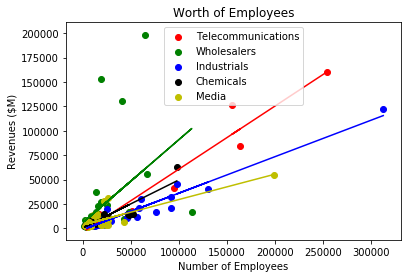

In [1035]:
#plotting 5 of the 21 companies on on graph
#plt.subplots(2,2)


plt.scatter(telcom['employees'], telcom["revenue"], color = 'r', marker = 'o',label = 'Telecommunications')
plt.scatter(wholesalers['employees'], wholesalers["revenue"], color = 'g', marker = 'o',label = 'Wholesalers')
plt.scatter(industrials['employees'], industrials["revenue"], color = 'b', marker = 'o', label = 'Industrials')
plt.scatter(chemicals['employees'], chemicals["revenue"], color = 'k', marker = 'o',label = 'Chemicals')
plt.scatter(media['employees'], media["revenue"], color = 'y', marker = 'o',label = 'Media')

plt.legend()

plt.xlabel("Number of Employees")
plt.ylabel("Revenues ($M)")
plt.title("Worth of Employees")

(slope, intercept, _, _, _) = stats.linregress(wholesalers["employees"], wholesalers["revenue"])
plt.plot(wholesalers['employees'],intercept + slope*wholesalers['employees'], 'g')
wholesalers_slope = slope

(slope2, intercept2, _, _, _) = stats.linregress(telcom["employees"], telcom["revenue"])
plt.plot(telcom['employees'],intercept2 + slope2*telcom['employees'], 'r')
telcom_slope = slope2

(slope3, intercept3, _, _, _) = stats.linregress(industrials["employees"], industrials["revenue"])
plt.plot(industrials['employees'],intercept3 + slope3*industrials['employees'], 'b')
industrials_slope = slope3

(slope4, intercept4, _, _, _) = stats.linregress(chemicals["employees"], chemicals["revenue"])
plt.plot(chemicals['employees'],intercept4 + slope4*chemicals['employees'], 'k')
chemicals_slope = slope4

(slope5, intercept5, _, _, _) = stats.linregress(media["employees"], media["revenue"])
plt.plot(media['employees'],intercept5 + slope5*media['employees'], 'y')
media_slope = slope5

plt.savefig('Images/telcomwholesaleindustchemmedia.png')

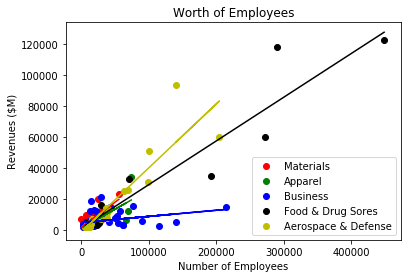

In [1036]:
#plotting 5 of the 21 companies on on graph
#plt.subplots(2,2)



plt.scatter(materials['employees'], materials["revenue"], color = 'r', marker = 'o',label ='Materials')
plt.scatter(apparel['employees'], apparel["revenue"], color = 'g', marker = 'o', label = 'Apparel')
plt.scatter(business['employees'], business["revenue"], color = 'b', marker = 'o', label = 'Business')
plt.scatter(food['employees'], food["revenue"], color = 'k', label = 'Food & Drug Sores')
plt.scatter(aerospace['employees'], aerospace["revenue"], color = 'y', label = 'Aerospace & Defense')

plt.legend()

plt.xlabel("Number of Employees")
plt.ylabel("Revenues ($M)")
plt.title("Worth of Employees")

(slope, intercept, _, _, _) = stats.linregress(materials["employees"], materials["revenue"])
plt.plot(materials['employees'],intercept + slope*materials['employees'], 'r')
materials_slope = slope

(slope2, intercept2, _, _, _) = stats.linregress(apparel["employees"], apparel["revenue"])
plt.plot(apparel['employees'],intercept2 + slope2*apparel['employees'], 'g')
apparel_slope = slope2

(slope3, intercept3, _, _, _) = stats.linregress(business["employees"], business["revenue"])
plt.plot(business['employees'],intercept3 + slope3*business['employees'], 'b')
business_slope = slope3

(slope4, intercept4, _, _, _) = stats.linregress(food["employees"], food["revenue"])
plt.plot(food['employees'],intercept4 + slope4*food['employees'], 'k')
food_slope = slope4

(slope5, intercept5, _, _, _) = stats.linregress(aerospace["employees"], aerospace["revenue"])
plt.plot(aerospace['employees'],intercept5 + slope5*aerospace['employees'], 'y')
aerospace_slope = slope5



plt.savefig('Images/materialsapparelbusfoodaero.png')

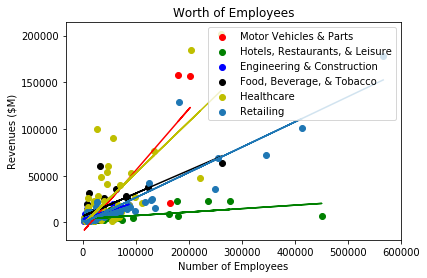

<Figure size 432x288 with 0 Axes>

In [1037]:
#plotting 5 of the 21 companies on on graph
#plt.subplots(2,2)



plt.scatter(motorvehicles['employees'], motorvehicles["revenue"], color = 'r', label = 'Motor Vehicles & Parts')
plt.scatter(hotels['employees'], hotels["revenue"], color = 'g', label = 'Hotels, Restaurants, & Leisure')
plt.scatter(engineering['employees'], engineering["revenue"], color = 'b', marker = 'o', label = 'Engineering & Construction ')
plt.scatter(foodbevtobacco['employees'], foodbevtobacco["revenue"], color = 'k', label = 'Food, Beverage, & Tobacco')
plt.scatter(healthcare['employees'], healthcare["revenue"], color = 'y', marker = 'o',label = 'Healthcare')

retailing = retailing.drop(0)
plt.scatter(retailing['employees'], retailing["revenue"], label = 'Retailing')

plt.legend()

plt.xlabel("Number of Employees")
plt.ylabel("Revenues ($M)")
plt.title("Worth of Employees")


(slope, intercept, _, _, _) = stats.linregress(motorvehicles["employees"], motorvehicles["revenue"])
plt.plot(motorvehicles['employees'],intercept + slope*motorvehicles['employees'], 'r')
motorvehicles_slope = slope 

(slope2, intercept2, _, _, _) = stats.linregress(hotels["employees"], hotels["revenue"])
plt.plot(hotels['employees'],intercept2 + slope2*hotels['employees'], 'g')
hotels_slope = slope2

(slope3, intercept3, _, _, _) = stats.linregress(engineering["employees"], engineering["revenue"])
plt.plot(engineering['employees'],intercept3 + slope3*engineering['employees'], 'b')
engineering_slope = slope3

(slope4, intercept4, _, _, _) = stats.linregress(foodbevtobacco["employees"], foodbevtobacco["revenue"])
plt.plot(foodbevtobacco['employees'],intercept4 + slope4*foodbevtobacco['employees'], 'k')
foodbevtobacco_slope = slope4

(slope5, intercept5, _, _, _) = stats.linregress(healthcare["employees"], healthcare["revenue"])
plt.plot(healthcare['employees'],intercept5 + slope5*healthcare['employees'], 'y')
healthcare_slope = slope5

(slope6, intercept6, _, _, _) = stats.linregress(retailing["employees"], retailing["revenue"])
plt.plot(retailing['employees'],intercept6 + slope6*retailing['employees'])
retailing_slope = slope6

plt.show()

plt.savefig('Images/everythingelse.png')


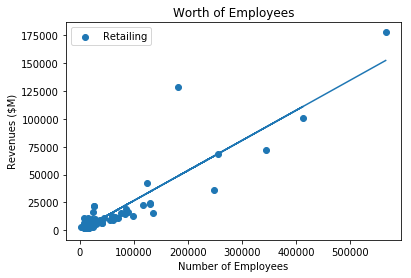

In [1038]:
#plotting retailing sector alone since walmart skews data
#retailing = retailing.drop(0)
plt.scatter(retailing['employees'], retailing["revenue"], label = 'Retailing')

plt.legend()

plt.xlabel("Number of Employees")
plt.ylabel("Revenues ($M)")
plt.title("Worth of Employees")

(slope, intercept, _, _, _) = stats.linregress(retailing["employees"], retailing["revenue"])
plt.plot(retailing['employees'],intercept + slope*retailing['employees'])
retailing_slope = slope



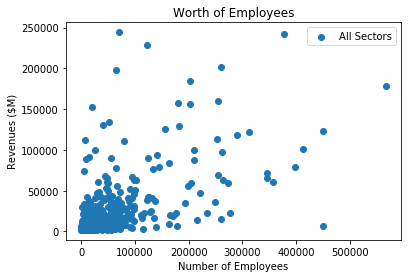

In [1039]:
# a plot of all the companies
fortune_dfnowm = fortune_df.drop(0)

plt.scatter(fortune_dfnowm['employees'],fortune_dfnowm['revenue'], label = 'All Sectors')

plt.legend()

plt.xlabel("Number of Employees")
plt.ylabel("Revenues ($M)")
plt.title("Worth of Employees")

#(slope, intercept, _, _, _) = stats.linregress(fortune_dfnowm["employees"], fortune_dfnowm["revenue"])
#plt.plot(fortune_dfnowm['employees'],intercept + slope*fortune_dfnowm['employees'])

plt.show()


In [1040]:
stats.ttest_1samp(fortune_dfnowm['employees'], fortune_dfnowm['revenue'].mean())

plt.savefig('Images/allsectornowalmart.png')

<Figure size 432x288 with 0 Axes>

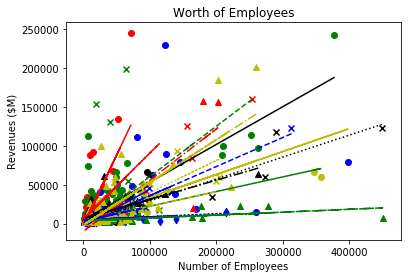

In [1041]:
#20 sectors... no reatailing cause you know, walmart
plt.scatter(Energy['employees'], Energy["revenue"], color = 'r', label = 'Energy')
plt.scatter(finance['employees'], finance["revenue"], color = 'g',label = 'Finance')
plt.scatter(tech['employees'], tech["revenue"], color = 'b',label = 'Technology')
plt.scatter(household['employees'], household["revenue"], color = 'k',label = 'Household Products')
plt.scatter(transportation['employees'], transportation["revenue"], color = 'y', label = 'Transportation')

plt.scatter(telcom['employees'], telcom["revenue"], color = 'r', marker = 'x',label = 'Telecommunications')
plt.scatter(wholesalers['employees'], wholesalers["revenue"], color = 'g', marker = 'x',label = 'Wholesalers')
plt.scatter(industrials['employees'], industrials["revenue"], color = 'b', marker = 'x', label = 'Industrials')
plt.scatter(chemicals['employees'], chemicals["revenue"], color = 'k', marker = 'x',label = 'Chemicals')
plt.scatter(media['employees'], media["revenue"], color = 'y', marker = 'x',label = 'Media')

plt.scatter(materials['employees'], materials["revenue"], color = 'r', marker = 'd',label ='Materials')
plt.scatter(apparel['employees'], apparel["revenue"], color = 'g', marker = 'd', label = 'Apparel')
plt.scatter(business['employees'], business["revenue"], color = 'b', marker = 'd', label = 'Business')
plt.scatter(food['employees'], food["revenue"], color = 'k', marker = 'x', label = 'Food & Drug Sores')
plt.scatter(aerospace['employees'], aerospace["revenue"], color = 'y', marker = 'x', label = 'Aerospace & Defense')

plt.scatter(motorvehicles['employees'], motorvehicles["revenue"], color = 'r', marker = '^', label = 'Motor Vehicles & Parts')
plt.scatter(hotels['employees'], hotels["revenue"], color = 'g', marker = '^',label = 'Hotels, Restaurants, & Leisure')
plt.scatter(engineering['employees'], engineering["revenue"], color = 'b', marker = '^', label = 'Engineering & Construction ')
plt.scatter(foodbevtobacco['employees'], foodbevtobacco["revenue"], color = 'k', marker = '^', label = 'Food, Beverage, & Tobacco')
plt.scatter(healthcare['employees'], healthcare["revenue"], color = 'y', marker = '^',label = 'Healthcare')

plt.xlabel("Number of Employees")
plt.ylabel("Revenues ($M)")
plt.title("Worth of Employees")


(slope, intercept, _, _, _) = stats.linregress(Energy["employees"], Energy["revenue"])
plt.plot(Energy['employees'],intercept + slope*Energy['employees'], 'r')
#energy_slope = slope

(slope2, intercept2, _, _, _) = stats.linregress(finance["employees"], finance["revenue"])
plt.plot(finance['employees'],intercept2 + slope2*finance['employees'], 'k')
#finance_slope = slope2

(slope3, intercept3, _, _, _) = stats.linregress(tech["employees"], tech["revenue"])
plt.plot(tech['employees'],intercept3 + slope3*tech['employees'], 'y')
#tech_slope = slope3

(slope4, intercept4, _, _, _) = stats.linregress(household["employees"], household["revenue"])
plt.plot(household['employees'],intercept4 + slope4*household['employees'], 'b')
#household_slope = slope4

(slope5, intercept5, _, _, _) = stats.linregress(transportation["employees"], transportation["revenue"])
plt.plot(transportation['employees'],intercept5 + slope5*transportation['employees'], 'g')
#transportation_slope = slope5

(slope6, intercept6, _, _, _) = stats.linregress(wholesalers["employees"], wholesalers["revenue"])
plt.plot(wholesalers['employees'],intercept6 + slope6*wholesalers['employees'], 'r', ls = 'dashed')
#wholesalers_slope = slope6

(slope7, intercept7, _, _, _) = stats.linregress(telcom["employees"], telcom["revenue"])
plt.plot(telcom['employees'],intercept7 + slope7*telcom['employees'], 'g',ls = 'dashed')
#telcom_slope = slope7

(slope8, intercept8, _, _, _) = stats.linregress(industrials["employees"], industrials["revenue"])
plt.plot(industrials['employees'],intercept8 + slope8*industrials['employees'], 'b',ls = 'dashed')
#industrials_slope = slope8

(slope9, intercept9, _, _, _) = stats.linregress(chemicals["employees"], chemicals["revenue"])
plt.plot(chemicals['employees'],intercept9 + slope9*chemicals['employees'], 'k',ls = 'dashed')
#chemicals_slope = slope9

(slope10, intercept5, _, _, _) = stats.linregress(media["employees"], media["revenue"])
plt.plot(media['employees'],intercept5 + slope5*media['employees'], 'y',ls = 'dashed')
#media_slope = slope10

(slope11, intercept11, _, _, _) = stats.linregress(materials["employees"], materials["revenue"])
plt.plot(materials['employees'],intercept11 + slope11*materials['employees'], 'r', ls = 'dotted')
#materials_slope = slope11

(slope12, intercept12, _, _, _) = stats.linregress(apparel["employees"], apparel["revenue"])
plt.plot(apparel['employees'],intercept12 + slope12*apparel['employees'], 'g',ls = 'dotted')
#apparel_slope = slope12

(slope13, intercept13, _, _, _) = stats.linregress(business["employees"], business["revenue"])
plt.plot(business['employees'],intercept13 + slope13*business['employees'], 'b', ls = 'dotted')
#business_slope = slope13

(slope14, intercept14, _, _, _) = stats.linregress(food["employees"], food["revenue"])
plt.plot(food['employees'],intercept14 + slope14*food['employees'], 'k', ls = 'dotted')
#food_slope = slope14

(slope15, intercept15, _, _, _) = stats.linregress(aerospace["employees"], aerospace["revenue"])
plt.plot(aerospace['employees'],intercept15 + slope15*aerospace['employees'], 'y', ls = 'dotted')
#aerospace_slope = slope15

(slope16, intercept16, _, _, _) = stats.linregress(motorvehicles["employees"], motorvehicles["revenue"])
plt.plot(motorvehicles['employees'],intercept16 + slope16*motorvehicles['employees'], 'r', ls = 'dashdot')
#motorvehicles_slope = slope16 

(slope17, intercept17, _, _, _) = stats.linregress(hotels["employees"], hotels["revenue"])
plt.plot(hotels['employees'],intercept17 + slope17*hotels['employees'], 'g', ls = 'dashdot')
#hotels_slope = slope2

(slope18, intercept18, _, _, _) = stats.linregress(engineering["employees"], engineering["revenue"])
plt.plot(engineering['employees'],intercept18 + slope18*engineering['employees'], 'b', ls = 'dashdot')
#engineering_slope = slope3

(slope19, intercept19, _, _, _) = stats.linregress(foodbevtobacco["employees"], foodbevtobacco["revenue"])
plt.plot(foodbevtobacco['employees'],intercept19 + slope19*foodbevtobacco['employees'], 'k', ls = 'dashdot')
#foodbevtobacco_slope = slope4

(slope20, intercept20, _, _, _) = stats.linregress(healthcare["employees"], healthcare["revenue"])
plt.plot(healthcare['employees'],intercept20 + slope20*healthcare['employees'], 'y', ls = 'dashdot')
#healthcare_slope = slope5



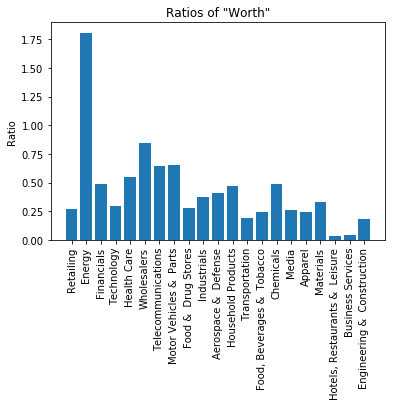

In [1042]:
#creating a dataframe to compare the ratios of "worth" of an employee to a comapany.

ratio_df = pd.DataFrame({
            "Sectors": ['Retailing', 'Energy', 'Financials', 'Technology', 'Health Care',
       'Wholesalers', 'Telecommunications', 'Motor Vehicles &  Parts',
       'Food &  Drug Stores', 'Industrials', 'Aerospace &  Defense',
       'Household Products', 'Transportation',
       'Food, Beverages &  Tobacco', 'Chemicals', 'Media', 'Apparel',
       'Materials', 'Hotels, Restaurants &  Leisure', 'Business Services',
       'Engineering &  Construction'],
        "Ratios": [retailing_slope,energy_slope,finance_slope,tech_slope,healthcare_slope,wholesalers_slope,telcom_slope,
                  motorvehicles_slope,food_slope,industrials_slope,aerospace_slope,household_slope,transportation_slope,
                  foodbevtobacco_slope,chemicals_slope,media_slope,apparel_slope,materials_slope,hotels_slope,business_slope,
                  engineering_slope]
                    })
ratio_df.head()


plt.bar(ratio_df["Sectors"],ratio_df["Ratios"])
plt.xticks(rotation=90)
plt.ylabel("Ratio")
plt.title('Ratios of "Worth"' )

plt.savefig('Images/barchart.png')

In [1043]:
# conclusions made


# Quite a few sectors have a clear linear correlation with the amount of employees they have and how much reveune they bring in
# 1. Companies can expect to scale in size an expect a constant return from the employees they hire this is due to a linear trend for most sectors

# 2. "Worth" ratios were calculated by comparing the revenue of a company to the amount of employees that the companies have
# the companies that have a higher ration value employees more as their work creates more revenue. This conclusion could mean that it may
#be more difficult to find a job in these sectors. There is the adverse effect with the companies with a low ratio
